# Cleaning and Analyzing Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TEFE) institute in Queensland, Australia.

We want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Some observations about the dete_survey data:

- We will need to calculate the period of time the employees worked in the department using the columns **Cease Date** and **DETE Start Date**.
- The **ID** column has integer values and should be easy to work with them
- The **Age** column has object values and they express an age gap (for example: 56 - 60, 61 or older, etc)
- There are too many columns and we will need to identify the ones that are unrelated to our analysis in order to drop them
- The last 5 columns barely have non-null values and are strong candidates to be dropped.

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Some observations about the tafe_survey data:

- The **Record ID** column has float values and we might have to change them into the integer type
- The period of time the employees worked at the institute can be easily accessed in the column **LengthOfServiceOverall** (in years)
- The **CurrentAge** column has object values and also represent age gaps (they are different gaps from the first dataset, though)
- There are too many columns and we will need to identify the ones that are unrelated to our analysis in order to drop them
- Also, some columns have very long names and they will have to be renamed to make the analysis easier

## Ages

In [6]:
print('DETE ages:')
print(dete_survey['Age'].value_counts(), end='\n\n')

print('TAFE ages:')
print(tafe_survey['CurrentAge. Current Age'].value_counts())

DETE ages:
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

TAFE ages:
56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64


We can see from the ages above that the majority of people who took the surveys are older than 50 years in both datasets.

## Separation types

In [7]:
print('DETE separation types:')
print(dete_survey['SeparationType'].value_counts(), end='\n\n')

print('TAFE separation types:')
print(tafe_survey['Reason for ceasing employment'].value_counts())

DETE separation types:
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

TAFE separation types:
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64


In the TAFE dataset, the most frequent separation type was resignation. We will have to analyse the data to find out if that was caused by some kind of dissatisfaction.

In the DETE dataset, the most frequent separation type was age retirement. However, there are two types (Resignation-Other Reasons and Resignation-Other employer) that represent a big share of the reasons that caused the end of the employment. They will have to be investigated. 

## Length of Service

In [8]:
print('TAFE Length of Service:')
print(tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(normalize=True))

TAFE Length of Service:
Less than 1 year      0.246644
1-2                   0.171141
3-4                   0.161074
11-20                 0.149329
More than 20 years    0.119128
5-6                   0.080537
7-10                  0.072148
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: float64


The period of time the TAFE employees worked at the institute can be seen above. At the top of the list, we can see that the vast majority of them worked for short periods. More than 57% of the employees stayed less than 4 years at the institute.

## Null values

In [9]:
print(dete_survey['Aboriginal'].isnull().value_counts(normalize=True))
print(dete_survey['Torres Strait'].isnull().value_counts(normalize=True))
print(dete_survey['South Sea'].isnull().value_counts(normalize=True))
print(dete_survey['Disability'].isnull().value_counts(normalize=True))
print(dete_survey['NESB'].isnull().value_counts(normalize=True))

True     0.980535
False    0.019465
Name: Aboriginal, dtype: float64
True     0.99635
False    0.00365
Name: Torres Strait, dtype: float64
True     0.991484
False    0.008516
Name: South Sea, dtype: float64
True     0.972019
False    0.027981
Name: Disability, dtype: float64
True     0.961071
False    0.038929
Name: NESB, dtype: float64


The columns above from the DETE dataset have more than 96% of their values null and will probably be dropped.

## Relevant columns

The following columns may be relevant for the DETE analysis:

- ID
- Age
- SeparationType
- Cease Data
- DETE Start Date
- Interpersonal conflicts
- Job dissatisfaction
- Dissatisfaction with the department
- Lack of recognition
- Lack of job security
- Employment conditions
- Traumatic incident
- Staff morale
- Workplace issue
- Peer support                        

The following columns may be relevant for the TAFE analysis:

- Record ID
- Reason for ceasing employment
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
- Contributing Factors. Interpersonal Conflict
- Main Factor. Which of these was the main factor for leaving?
- CurrentAge. Current Age
- LengthofServiceOverall. Overall Length of Service at Institute (in years)'

Since the stakeholders wans us to combine the results for both surveys, we will need to find the corresponding columns between both datasets. For example: **Separation Type** and **Reason for ceasing employment** could be stored in a single column.

## 1. Handling missing values

The dete_survey dataframe contains **'Not Stated'** values that indicate values are missing, but they aren't represent as **NaN**. 

First, we will use the pd.read_csv() function to specify these values as **Nan**.

In [10]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## 2. Dropping columns

Next, let's drop some columns from each dataframe that we don't need in our analysis to make the dataframes easier to work with.

To do that, we will use the DataFrame.drop() method.

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print('Columns that have been removed from dete_survey: ')
print(dete_survey.columns[28:49], end='\n\n')
print('Columns in the dete_survey_updated:')
print(dete_survey_updated.columns)

Columns that have been removed from dete_survey: 
Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

Columns in the dete_survey_updated:
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print('Columns that have been removed from tafe_survey: ')
print(tafe_survey.columns[17:66], end='\n\n')
print('Columns in the tafe_survey_updated:')
print(tafe_survey_updated.columns)

Columns that have been removed from tafe_survey: 
Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'Ins

## 3. Renaming columns

Each dataframe contains many of the same columns, but the columns names are different, such as:

- **ID** and **Record ID**
- **SeparationType** and **Reason for ceasing employment**
- **Age** and **CurrentAge. Current Age**
- etc.

Now we will standardize the column names. First, we will use the following criteria to update the DETE column names:

1. Make all the capitalization lowercase.
2. Remove any trailing whitespace from the end of the strings.
3. Replace spaces with underscores.

As an example, **Cease_Date** should be updated to **cease_date**.

In [13]:
print('DETE columns before the changes:')
print(dete_survey_updated.columns, end='\n\n')
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower()
print('DETE columns after the changes:')
print(dete_survey_updated.columns)

DETE columns before the changes:
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

DETE columns after the changes:
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_mo

Now we will change some TAFE column names so that they match the new column names in the DETE dataset.

In [14]:
print('TAFE columns before the changes:')
print(tafe_survey_updated.columns, end='\n\n')
tafe_survey_updated.rename(columns=
                           {'Record ID':'id', 
                            'CESSATION YEAR':'cease_date',
                            'Reason for ceasing employment': 'separationtype',
                            'Gender. What is your Gender?': 'gender',
                            'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                           }, inplace=True)
print('TAFE columns after the changes:')
print(tafe_survey_updated.columns)

TAFE columns before the changes:
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workpl

## 4. Selecting the resignations 

Recall that our end goal is to answer the following questions:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

So for this project, we'll only analyze survey respondents who *resigned*, so their separation type contains the string **'Resignation'**.

Let's use the **Series.value_counts()** method to review the unique values in the separationtype column in both datasets.

In [15]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

Let's remove the only line with a missing value in **separationtype** in tafe_survey_updated.

In [17]:
tafe_survey_updated = tafe_survey_updated[tafe_survey_updated['separationtype'].notnull()]
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In each of the dataframes, let's select only the data for survey respondants who a **Resignation** separation type.

In [18]:
dete_survey_resignation = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]
print(dete_survey_resignation['separationtype'].value_counts(), end='\n\n')
print(dete_survey_resignation[['id', 'separationtype']].head(10))

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

    id                        separationtype
3    4             Resignation-Other reasons
5    6             Resignation-Other reasons
8    9             Resignation-Other reasons
9   10            Resignation-Other employer
11  12  Resignation-Move overseas/interstate
12  13             Resignation-Other reasons
14  15            Resignation-Other employer
16  17             Resignation-Other reasons
20  21            Resignation-Other employer
21  22             Resignation-Other reasons


In [19]:
tafe_survey_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation')]
print(tafe_survey_resignation['separationtype'].value_counts(), end='\n\n')
print(tafe_survey_resignation[['id', 'separationtype']].head())

Resignation    340
Name: separationtype, dtype: int64

             id separationtype
3  6.341399e+17    Resignation
4  6.341466e+17    Resignation
5  6.341475e+17    Resignation
6  6.341520e+17    Resignation
7  6.341537e+17    Resignation


Let's create copies of the selections we have done to avoid the SettingWithCopy Warning.

In [20]:
dete_resignations = dete_survey_resignation.copy()
tafe_resignations = tafe_survey_resignation.copy()

## 5. Checking inconsistencies in the years

In this step, we'll focus on verifying that the years in the **cease_date** and **dete_start_date** columns make sense.

Since the **cease_date** is the last year of the person's employment and the **dete_start_date** is the person's first year of employment, it wouldn't make sense to have years after the current date.

Also, given that most people in this field start working in their 20s, it's unlikely that the **dete_start_date** was before the year 1940.

In [21]:
print(dete_resignations['cease_date'].value_counts(), end='\n\n')
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
print(dete_resignations['cease_date'].value_counts(dropna=False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64


In [22]:
print('dete_start_date')
print(dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(), end='\n\n')
print('cease_date')
print(dete_resignations['cease_date'].value_counts(dropna=False).sort_index())

dete_start_date
 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64

cease_date
 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64


The DETE start dates range from 1963 to 2013 and cease dates range from 2006 and 2014.

In [23]:
print(tafe_resignations['cease_date'].value_counts(dropna=False).sort_index())

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64


The TAFE cease dates range from 2009 and 2013.

Below are our findings:

- There are no years after the current date.
- There is no dete_start_date before the year 1940.

Thus, the year columns seem reasonable and we will keep them like that.

In [24]:
tafe_resignations['institute_service']

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
              ...        
659                   1-2
660                   3-4
661                   5-6
665                   NaN
666                   NaN
669                   3-4
670                   NaN
671      Les

## 6. Creating a new column 'institute_service'

The tafe_resignations dataframe already contains a "service" column, which we renamed to **institute_service**, and represents the time (in years) an employee worked at the institute.

Next, we'll create a corresponding **institute_service** column in dete_resignations. We'll calculate its values by calculating the difference between the columns **cease_date** and **dete_start_date**.

In [25]:
dete_institute_service = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'] = dete_institute_service
print(dete_resignations[['dete_start_date','cease_date','institute_service']])

     dete_start_date  cease_date  institute_service
3             2005.0      2012.0                7.0
5             1994.0      2012.0               18.0
8             2009.0      2012.0                3.0
9             1997.0      2012.0               15.0
11            2009.0      2012.0                3.0
12            1998.0      2012.0               14.0
14            2007.0      2012.0                5.0
16               NaN      2012.0                NaN
20            1982.0      2012.0               30.0
21            1980.0      2012.0               32.0
22            1997.0      2012.0               15.0
23            1973.0      2012.0               39.0
25            1995.0      2012.0               17.0
27            2005.0      2012.0                7.0
33            2003.0      2012.0                9.0
34            2006.0      2012.0                6.0
37            2011.0      2012.0                1.0
39               NaN      2012.0                NaN
40          

## 7. Identifying dissatisfied employees

Below are the columns we'll use to categorize employees as dissatisfied from each dataframe.

**tafe_survey_updated**:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

**dete_survey_updated**:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employeed indicated any of the factors above cause them to resing, we'll mark them as **dissatisfied** in a new boolean column.

In [26]:
print(tafe_survey_updated['Contributing Factors. Dissatisfaction'].value_counts(), end='\n\n')
print(tafe_survey_updated['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [27]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val is '-':
        return False
    else: 
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
#tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction','dissatisfied']].head(10)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Looking at the **dissatisfied** column in each dataframe, we can see that:

- 91 people from TAFE dataset resigned because they were dissatisfied
- 149 people from DETE dataset resigned because they were dissatisfied

## 8. Combining the datasets

First, let's add a column to each dataframe that will allow us to easily distinguish between the two. 

We'll add a column named **institute** to **dete_resignations_up**. Each row will contain the value **DETE**.

Similarly, we'll add a column named **institute** to **tafe_resignations_up**. Each row will contain the value **TAFE**.

In [29]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Now we'll combine the dataframes using the concat() function.

In [30]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

Next, let's drop any columns with less than 500 non null values.

In [31]:
combined_updated = combined.dropna(axis=1, thresh=500).copy()

## 9. Cleaning up the 'institute_service' column

Let's take a look at the unique values of the **institute_service** column in the combined_updated.

In [32]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


There are specific years and also some year gaps. Let's convert all the values into categories. We'll use the following definitions to categorize the values:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company 

First, let's extract the years of service from each value in the **institute_service** column.

In [33]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')
combined_updated['institute_service'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

Next, let's write a function to categorize the years and apply it to the **institute_service** column using the Series.apply() method. Let's assign the results to a new column named **service_cat**.

In [34]:
def categorize(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif 3 <= year <= 6:
        return 'Experienced'
    elif 7 <= year <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## 10. Starting the analysis

In [35]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There are 8 missing values in the dissastified column. Let's use the DataFrame.fillna() method to replace those values with the value that occurs most frequently in this column (False).

In [36]:
most_frequent = combined_updated['dissatisfied'].value_counts().index[0]
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(most_frequent)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Next, let's use DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each **service_cat** group.

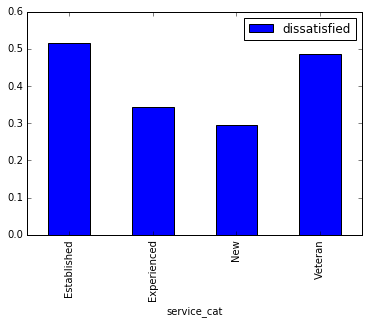

In [48]:
dissatisfaction_experience = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
%matplotlib inline
dissatisfaction_experience.plot(kind='bar')

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service (Established and Veteran categories) are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

Besides that, the new employees (less than 3 years of service) are the least likely of the categories to resign because of some kind of dissatisfaction.

## 11. Further analysis

We still have the following questions to be answered:

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In order to do that, we will need to clean the age column and then group the data according to it.

In [41]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [46]:
combined_updated['age'] = combined_updated['age'].astype('str').str.replace('  ','-')
combined_updated['age'].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

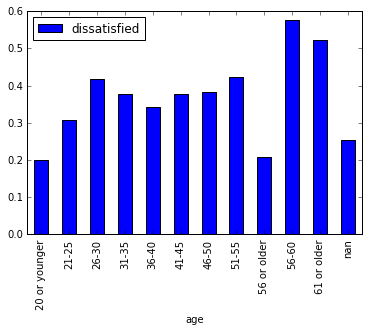

In [52]:
dissatisfaction_age = combined_updated.pivot_table(values='dissatisfied', index='age')
dissatisfaction_age.plot(kind='bar')

We can see in the bar graph above that the youngest employees (up to 25 years old) are the least likely of the groups to resign because of some kind of dissatisfaction.

Conversely, the oldest employees (over 56 years old) are the most likely of the groups to resign because of some kind of dissatisfaction.